In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import seaborn as sns

In [2]:
try:
    df= pd.read_csv("BostonHousing.csv")
except FileNotFoundError:
    print("Dataset has to downloaded from Kaggle and placed in the same directory as the jupyter notebook")
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
selected_cols=['crim','rm','age','dis','rad','medv']
df_filtered= df[selected_cols]
df_filtered.head(5)

,crim,rm,age,dis,rad,medv
0,0.00632,6.575,65.2,4.0900,1,24.0
1,0.02731,6.421,78.9,4.9671,2,21.6
2,0.02729,7.185,61.1,4.9671,2,34.7
3,0.03237,6.998,45.8,6.0622,3,33.4
4,0.06905,7.147,54.2,6.0622,3,36.2


#### segregating the dataset into training and testing examples

In [4]:
X= df_filtered[['crim','rm','age','dis','rad']].values.tolist()
y=df_filtered['medv'].values.tolist()
Xy=list(zip(X,y))
random.shuffle(Xy)
Xy_train=[]; Xy_test=[]
demarc_sample=np.floor(0.7*len(Xy))
for i in range(len(Xy)):
    if(i<demarc_sample):
        Xy_train.append(Xy[i])
    else:
        Xy_test.append(Xy[i])
X_train,y_train=map(list,zip(*Xy_train))
X_test,y_test=map(list,zip(*Xy_test))

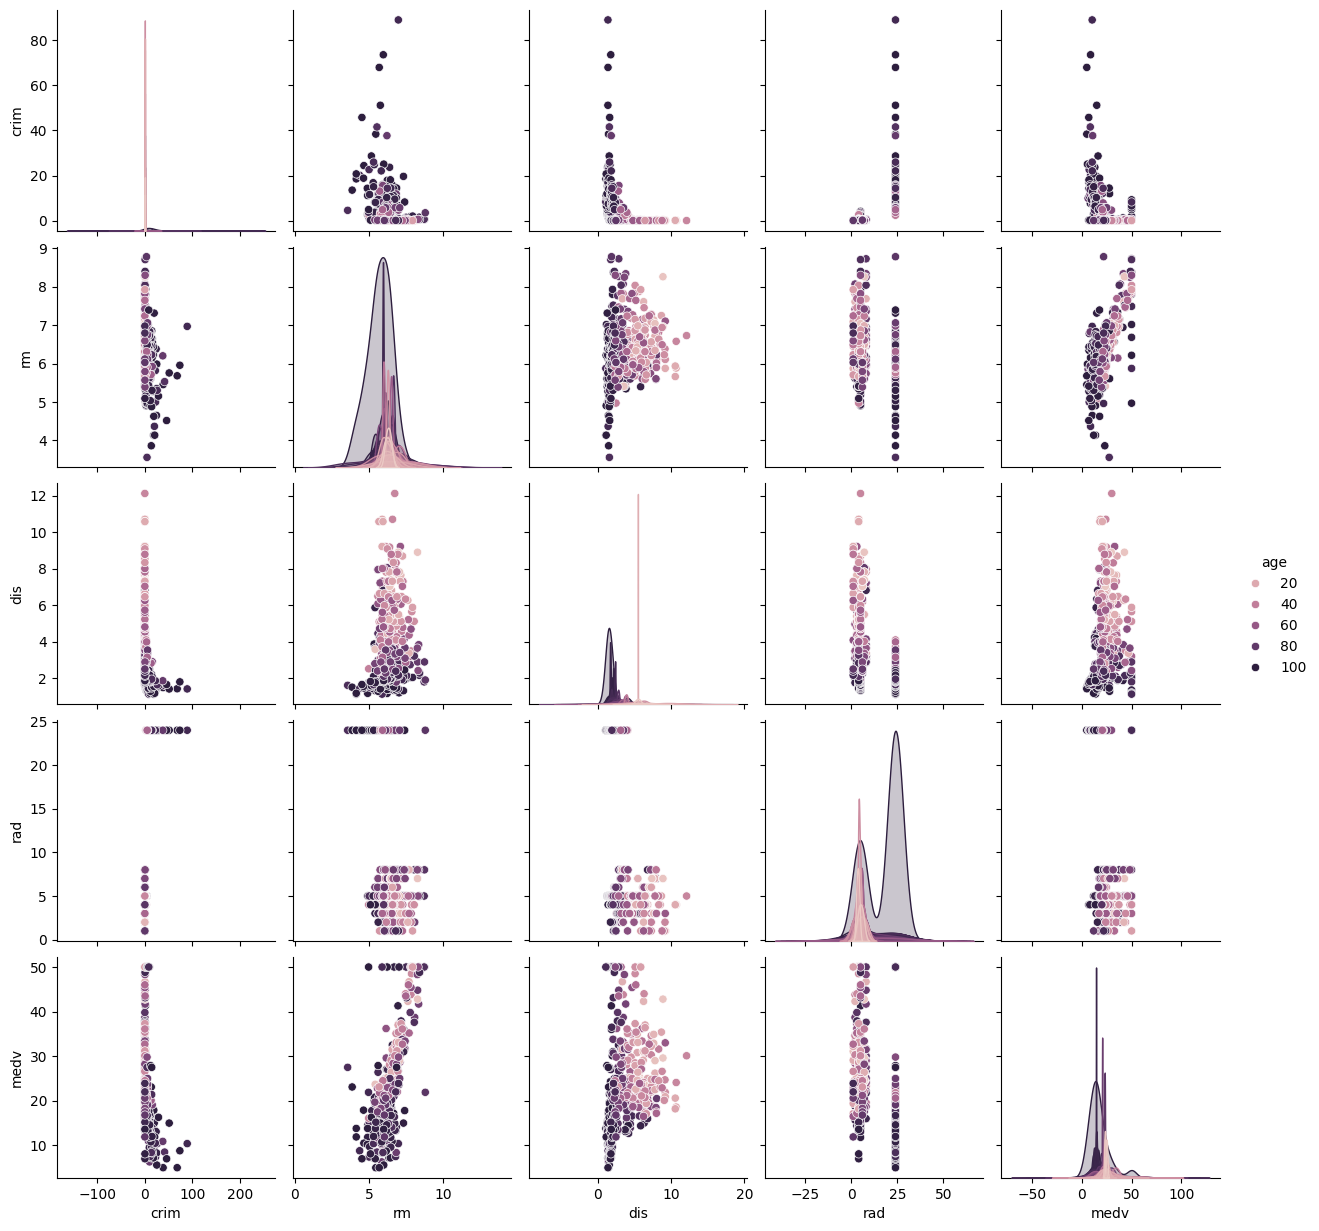

In [5]:
sns.pairplot(data=df_filtered, hue='age')

## standardizing our dataset

In [6]:
#normalizing X_train
X_train_T=np.array(X_train).T
X_train_std=[]
mean_list=[]
std_dev_list=[]
for features in X_train_T:
    mean=sum(features)/len(features)
    mean_list.append(mean)
    std_dev=(sum([(x-mean)**2 for x in features])/len(features))**0.5
    std_dev_list.append(std_dev)
    x_std=[(x-mean)/std_dev for  x in features]
    X_train_std.append(x_std)
X_train=np.array(X_train_std).T

#normalizing X_test
X_test_T=np.array(X_test).T
X_test_std=[]
for j,features in enumerate(X_test_T):
    x_std=[(x-mean_list[j])/std_dev_list[j] for x in features]
    X_test_std.append(x_std)
X_test=np.array(X_test_std).T

## single batch gradient descent 

In [7]:
loss_history=[]

class LinearRegression:
    def __init__(self,X_train):
        self.w=[random.uniform(-1,1) for _ in range(len(X_train[0]))]
        self.b=random.uniform(-1,1)
        
    def loss_function(self,X_train,y_train):
        SE=0
        for i in range(len(X_train)):
            y_pred=sum((wi*xi for wi,xi in zip(self.w,X_train[i])),self.b) 
            y_tg=y_train[i]
            SE+=(y_pred-y_tg)**2
        RMSE=(SE/len(X_train))**0.5
        return RMSE
        
    def gradient_descent(self,X_train,y_train,alpha):
        error=0
        w_grad=[0 for _ in range(len(self.w))]
        b_grad=0
        for i in range(len(X_train)):
            y_pred=sum((wi*xi for wi,xi in zip(self.w,X_train[i])),self.b) 
            y_tg=y_train[i]
            error=(y_pred-y_tg)
            for j in range(len(self.w)):
                w_grad[j]+=error*X_train[i][j]
            b_grad+=error
        for k in range(len(self.w)):
            self.w[k]+=(-2/len(X_train))*alpha*w_grad[k]
        self.b+=(-2/len(X_train))*alpha*b_grad
        return f' w={self.w} , b={self.b}'
        
    def predict(self,X_test):
        prediction=[]
        for i in range(len(X_test)):
            prediction.append(sum((wi*xi for wi,xi in zip(self.w,X_test[i])),self.b))
        return prediction

    def R_squared(self,X_test,y_test):
        y_mean=sum(y_test)/len(y_test)
        TSS=sum([(y-y_mean)**2 for y in y_test])
        y_pred=[]
        for i in range(len(X_test)):
            y_pred.append(sum((wi*xi for wi,xi in zip(self.w,X_test[i])),self.b))
        RSS=sum([(y1-y2)**2 for y1,y2 in zip(y_pred,y_test)])
        return 1-(RSS/TSS)

epochs=1000

model=LinearRegression(X_train)
for i in range(epochs):
    model.gradient_descent(X_train,y_train,alpha=0.01)
    print(model.loss_function(X_train,y_train))
    loss_history.append(model.loss_function(X_train,y_train))         

23.96066681194232
23.480269941511345
23.01341083300588
22.55955914972685
22.11821661632464
21.68891474060107
21.27121269482102
20.864695346587304
20.468971429757367
20.08367184631526
19.708448090552213
19.342970787348943
18.986928336789465
18.640025657766667
18.301983023660693
17.972534983581063
17.651429363060867
17.338426338473344
17.033297579809275
16.7358254568047
16.445802303744163
16.16302973858294
15.887318032334438
15.618485524954341
15.356358084223023
15.100768604381805
14.851556541517077
14.608567482910525
14.371652747783113
14.140669017056862
13.915477989941262
13.695946065321904
13.481944046087833
13.273346864681773
13.07003332829434
12.871885882250632
12.67879039025518
12.49063593026989
12.307314604900256
12.128721365257265
11.954753847348034
11.785312220125817
11.620299044402298
11.459619141890071
11.303179473703578
11.150889027700968
11.002658714098857
10.85840126883723
10.718031164211714
10.581464526327506
10.44861905896168
10.319413973450178
10.193769924241868
10.07160

 ##### the model's RMSE would not converge to zero because of the noise in the dataset

### plotting the RMSE for each epoch

Text(0, 0.5, 'RMSE')

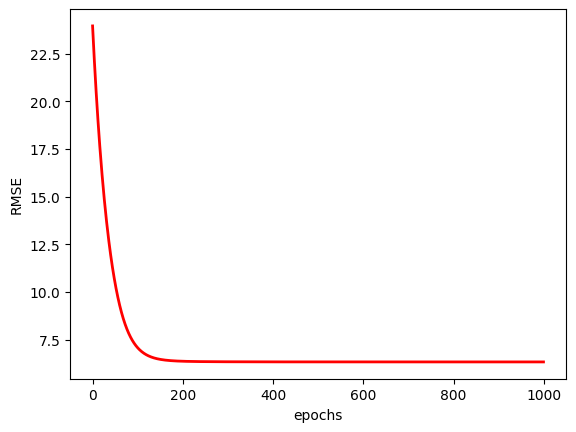

In [8]:
sns.lineplot(x=range(epochs),y=loss_history, color='red', linewidth=2)
plt.xlabel("epochs")
plt.ylabel("RMSE")

## testing our model on test dataset

In [9]:
y_pred=[float(x) for x in model.predict(X_test)]
print(*y_pred, sep='\n')

24.63464018846684
25.15056080460218
23.91136338092029
23.089677789425263
15.445751916684047
31.00721510041522
15.546029225018144
35.05760145389842
22.710216504241135
35.21189684131361
25.781816785275797
15.13433235676734
20.52458572093328
37.5258893896542
18.254386316859804
29.75040761700645
21.139741000226927
26.79140027295185
10.877201853372748
24.42586393791234
15.40098038394497
9.889939520604104
14.100976903141332
25.65420740521998
39.05670122495365
27.49267413377048
22.07038784154217
20.08254201200016
24.691320413074152
22.13846675596705
26.347517996869495
19.554509734172644
1.489078783735398
21.57741977677886
41.75452182469611
19.212645766132095
23.489364182097702
31.109177219871544
21.52589456045666
33.71306516934769
16.725392487435833
17.738884249043664
22.33732403709888
35.7247205056801
20.608384704656658
20.28904752717581
23.671286787801023
18.52417689978245
24.296148718371427
9.013264549636991
23.84242591925091
20.322919569613365
30.06562892314267
30.12734084688441
21.156965

Text(0.5, 1.0, 'Accuracy of my model')

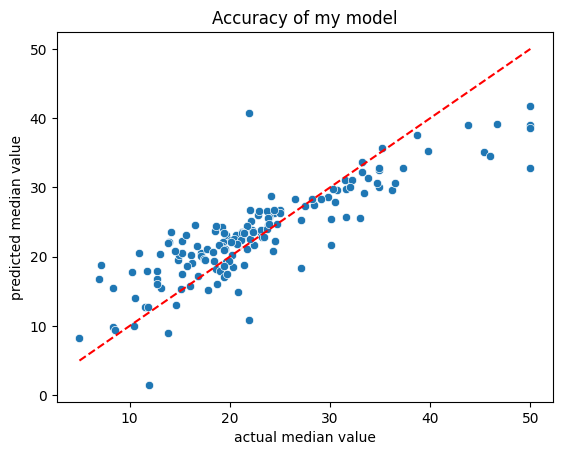

In [10]:
sns.scatterplot(x=y_test,y=y_pred)
sns.lineplot(x=y_test,y=y_test, linestyle='--',color='red')
plt.xlabel("actual median value"); plt.ylabel("predicted median value")
plt.title("Accuracy of my model")

#### quantifying the accuracy of the model using R^2 parameter

In [11]:
print(model.R_squared(X_test,y_test))

0.7200432291842458
